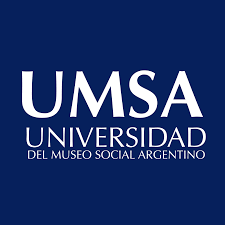

 # **<font color="DarkBlue">Unir, combinar y remodelar 🐼 </font>**

<p align="center">
<img src="https://pandas.pydata.org/static/img/pandas_mark.svg" width="50">
</p>


https://pandas.pydata.org/

 # **<font color="DarkBlue">Manipulando datos</font>**

<p align="justify">
Las manipulaciones de datos específicas que desarrollaremos serán la fusión (<em>merge</em>), concatenación (<em>concatenate</em>) y agrupación (<em>groupby</em>). Estas operaciones no solo nos permitirán combinar datos de manera eficiente, sino que también serán útiles para reorganizarlos en el formato más adecuado para su análisis, simplificando el procesamiento de grandes conjuntos de datos.
</p>


 # **<font color="DarkBlue">Fusión de datos, merge</font>**

👀 Ejemplo:

<p align="justify">
🚀 Imagina que tienes dos conjuntos de datos, uno con las ventas de varios productos y otro con los datos de los empleados que realizaron las ventas. Queremos combinar esta información para tener una visión integral de qué empleados realizaron qué ventas.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# DataFrame 1: Ventas por productos

ventas = pd.DataFrame({
    'Venta_ID': [101, 102, 103, 104],
    'Producto': ['Laptop', 'Celular', 'Tablet', 'Monitor'],
    'Monto_Venta': [1200, 800, 300, 450],
    'Empleado_ID': [1, 2, 1, 3]
})


<p align="justify">
DataFrame ventas: Contiene información sobre las ventas realizadas. Cada venta tiene un Venta_ID, un producto vendido, el monto de la venta y el ID del empleado que realizó la venta.

In [ ]:
ventas

,Venta_ID,Producto,Monto_Venta,Empleado_ID
0,101,Laptop,1200,1
1,102,Celular,800,2
2,103,Tablet,300,1
3,104,Monitor,450,3


In [ ]:
# DataFrame 2: Datos de empleados
empleados = pd.DataFrame({
    'Empleado_ID': [1, 2, 3],
    'Nombre': ['Juan', 'María', 'Pedro'],
    'Departamento': ['Electrónica', 'Telefonía', 'Accesorios']
})


<p align="justify">
DataFrame empleados: Contiene los datos de los empleados, como su Empleado_ID, nombre y el departamento en el que trabajan.

In [ ]:
empleados

,Empleado_ID,Nombre,Departamento
0,1,Juan,Electrónica
1,2,María,Telefonía
2,3,Pedro,Accesorios


In [ ]:
# Unimos los DataFrames usando el método merge

df_merged = pd.merge(ventas, empleados, on='Empleado_ID')


<p align="justify">
<code>merge()</code>: El método <code>merge()</code> permite combinar estos dos DataFrames a través de una columna en común, en este caso Empleado_ID. El resultado es un DataFrame que contiene toda la información de ventas, productos y empleados.

In [ ]:
df_merged

,Venta_ID,Producto,Monto_Venta,Empleado_ID,Nombre,Departamento
0,101,Laptop,1200,1,Juan,Electrónica
1,102,Celular,800,2,María,Telefonía
2,103,Tablet,300,1,Juan,Electrónica
3,104,Monitor,450,3,Pedro,Accesorios


<p align="justify">
El método <code>merge()</code> es útil en análisis de datos empresariales donde los datos están distribuidos en diferentes tablas.
<br><br>
Por ejemplo, puedes tener un conjunto de datos de ventas y otro conjunto de datos de empleados, y necesitar combinar esta información para realizar un análisis más profundo, como identificar qué empleados son responsables de las ventas más altas o evaluar el desempeño por departamento

<p align="justify">
A continuación, se describen los comportamientos que puede adoptar el parámetro <code>how</code> al realizar combinaciones entre tablas en pandas:
<br><br>
<strong>how="inner"</strong>: Utiliza únicamente las combinaciones de teclas observadas en ambas tablas.
<br><br>
<strong>how="left"</strong>: Utiliza todas las combinaciones de teclas que se encuentran en la tabla de la izquierda.
<br><br>
<strong>how="right"</strong>: Utiliza todas las combinaciones de teclas que se encuentran en la tabla de la derecha.
<br><br>
<strong>how="outer"</strong>: Utiliza todas las combinaciones de teclas observadas en ambas tablas juntas.
</p>


<p align="justify">
Ahora vemos otro ejemplo, con dos conjuntos de datos, las ventas y los clientes, y el comportamiento de la fusión de los datos lo ajustamos con el parámetro <code>how=</code>

In [ ]:
# Creamos DataFrames

ventas = pd.DataFrame({
    'Cliente_ID': [1, 2, 3],
    'Producto': ['A', 'B', 'C'],
    'Ventas_Q1': [100, 150, 200]
})

clientes = pd.DataFrame({
    'Cliente_ID': [1, 2, 4],
    'Nombre': ['Juan', 'María', 'Carlos']
})


In [ ]:
ventas

,Cliente_ID,Producto,Ventas_Q1
0,1,A,100
1,2,B,150
2,3,C,200


In [ ]:
clientes

,Cliente_ID,Nombre
0,1,Juan
1,2,María
2,4,Carlos


 ## **<font color="DarkBlue">Inner Join</font>**

In [ ]:
# Inner Join: Combina solo las claves presentes en ambos DataFrames

inner_merge = pd.merge(ventas, clientes, on='Cliente_ID', how='inner')
print("Inner Join:")
inner_merge


Inner Join:


,Cliente_ID,Producto,Ventas_Q1,Nombre
0,1,A,100,Juan
1,2,B,150,María


 ## **<font color="DarkBlue">Left Join</font>**

In [ ]:
# Left Join: Utiliza todas las claves de la tabla de la izquierda (ventas)

left_merge = pd.merge(ventas, clientes, on='Cliente_ID', how='left')
print("\nLeft Join:")
left_merge



Left Join:


,Cliente_ID,Producto,Ventas_Q1,Nombre
0,1,A,100,Juan
1,2,B,150,María
2,3,C,200,NaN


 ## **<font color="DarkBlue">Right Join</font>**

In [ ]:
# Right Join: Utiliza todas las claves de la tabla de la derecha (clientes)

right_merge = pd.merge(ventas, clientes, on='Cliente_ID', how='right')
print("\nRight Join:")
right_merge



Right Join:


,Cliente_ID,Producto,Ventas_Q1,Nombre
0,1,A,100.0,Juan
1,2,B,150.0,María
2,4,NaN,NaN,Carlos


 ## **<font color="DarkBlue">Outer Join</font>**

In [ ]:
# Outer Join: Utiliza todas las claves observadas en ambas tablas

outer_merge = pd.merge(ventas, clientes, on='Cliente_ID', how='outer')
print("\nOuter Join:")
outer_merge


Outer Join:


,Cliente_ID,Producto,Ventas_Q1,Nombre
0,1,A,100.0,Juan
1,2,B,150.0,María
2,3,C,200.0,NaN
3,4,NaN,NaN,Carlos


 # **<font color="DarkBlue">Concatenación</font>**

 ## **<font color="DarkBlue">Concatenando filas</font>**

👀 Ejemplo:

<p align="justify">
🚀 Imagina que tienes datos de ventas de dos sucursales diferentes de una cadena de tiendas y quieres combinar estos datos en un único DataFrame.

In [ ]:
# Datos de ventas de la sucursal 1

ventas_sucursal_1 = pd.DataFrame({
    'Producto': ['Laptop', 'Celular', 'Tablet'],
    'Monto_Venta': [1200, 800, 300],
    'Sucursal': ['Sucursal 1', 'Sucursal 1', 'Sucursal 1']
})


<p align="justify">
DataFrame ventas_sucursal_1: Contiene información sobre las ventas realizadas en la sucursal 1. Para cada producto, tenemos el monto de la venta y la sucursal de origen.

In [ ]:
ventas_sucursal_1

,Producto,Monto_Venta,Sucursal
0,Laptop,1200,Sucursal 1
1,Celular,800,Sucursal 1
2,Tablet,300,Sucursal 1


In [ ]:
# Datos de ventas de la sucursal 2

ventas_sucursal_2 = pd.DataFrame({
    'Producto': ['Monitor', 'Teclado', 'Mouse'],
    'Monto_Venta': [450, 50, 25],
    'Sucursal': ['Sucursal 2', 'Sucursal 2', 'Sucursal 2']
})


<p align="justify">
DataFrame ventas_sucursal_2: Similar al anterior, pero con los datos de la sucursal 2.


In [ ]:
ventas_sucursal_2

,Producto,Monto_Venta,Sucursal
0,Monitor,450,Sucursal 2
1,Teclado,50,Sucursal 2
2,Mouse,25,Sucursal 2


In [ ]:
# Concatenar los datos de las dos sucursales

ventas_total = pd.concat([ventas_sucursal_1, ventas_sucursal_2])


<p align="justify">
El método concat() combina los dos DataFrames apilándolos uno debajo del otro. En este caso, no especificamos ningún eje, lo que significa que concatenamos filas (por defecto)

In [ ]:
ventas_total

,Producto,Monto_Venta,Sucursal
0,Laptop,1200,Sucursal 1
1,Celular,800,Sucursal 1
2,Tablet,300,Sucursal 1
0,Monitor,450,Sucursal 2
1,Teclado,50,Sucursal 2
2,Mouse,25,Sucursal 2


<p align="justify">
Este método es útil cuando tienes conjuntos de datos de diferentes fuentes o ubicaciones, como sucursales, regiones o departamentos, y necesitas combinarlos para realizar un análisis conjunto. Por ejemplo, podrías concatenar los datos de ventas de todas tus sucursales para evaluar el rendimiento global de tu empresa o comparar las ventas entre diferentes ubicaciones.

 ## **<font color="DarkBlue">Concatenando columnas</font>**

👀 Ejemplo:

<p align="justify">
🚀 Supongamos que tenemos dos DataFrames. Uno contiene información de clientes y el otro contiene información sobre las compras de productos que realizaron esos clientes. Queremos concatenar las columnas de estos dos DataFrames para crear una tabla completa que una la información de clientes con los productos que han comprado.



In [ ]:
# Crear DataFrames
clientes = pd.DataFrame({
    'Cliente_ID': [1, 2, 3],
    'Nombre': ['Juan', 'María', 'Carlos'],
    'Apellido': ['Pérez', 'García', 'Sánchez']
})

compras = pd.DataFrame({
    'Cliente_ID': [1, 2, 3],
    'Producto': ['Laptop', 'Tablet', 'Smartphone'],
    'Cantidad': [1, 2, 1]
})


In [ ]:
clientes

,Cliente_ID,Nombre,Apellido
0,1,Juan,Pérez
1,2,María,García
2,3,Carlos,Sánchez


In [ ]:
compras

,Cliente_ID,Producto,Cantidad
0,1,Laptop,1
1,2,Tablet,2
2,3,Smartphone,1


In [ ]:
# Concatenar columnas de los dos DataFrames

data_completa = pd.concat([clientes, compras[['Producto', 'Cantidad']]], axis=1)

In [ ]:
data_completa

,Cliente_ID,Nombre,Apellido,Producto,Cantidad
0,1,Juan,Pérez,Laptop,1
1,2,María,García,Tablet,2
2,3,Carlos,Sánchez,Smartphone,1


<p align="justify">
Este enfoque es útil cuando los DataFrames que se desean concatenar están alineados por su índice y se quiere juntar la información para un análisis más completo.








<br>
<br>
<p align="center"><b>
💗
<font color="DarkBlue">
Hemos llegado al final de nuestro colab de Pandas, a seguir codeando...
</font>
</p>